In [2]:
import os 
import sys
print(os.getcwd())
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
sys.path.append(parent_directory)

# MuJoCo may reset current work directory, so we need to reset it
WORK_DIR = os.getcwd()

/home/hao/Desktop/myoelbow/myoelbow-spasticity/dev


In [6]:
import mujoco
import mujoco.viewer
import numpy as np

# Path to the MuJoCo model file
model_path = "../myosuite/simhive/myo_sim/elbow/myoelbow_1dof6muscles_1dofexo_position.xml"
# Load the model
m = mujoco.MjModel.from_xml_path(model_path)
data = mujoco.MjData(m)
# m = mujoco.MjModel.from_binary_path(model_path) # load .mjb files

# turn off the gravity
m.opt.gravity[:] = [0, 0, 0]
# remove skin
geom_1_indices = np.where(m.geom_group == 1)
m.geom_rgba[geom_1_indices, 3] = 0
print(os.getcwd())
print("Muscles:")
for i in range(len(m.name_actuatoradr)):
    print([i,m.name_actuatoradr[i],data.actuator_length[i]])
# print(mjcModel.joint_names)
print("\nJoints:")
for i in range(len(m.name_jntadr)):
    print([i,m.name_jntadr[i]])

'''
Muscles:
[0, 'Exo']
[1, 'TRIlong']
[2, 'TRIlat']
[3, 'TRImed']
[4, 'BIClong']
[5, 'BICshort']
[6, 'BRA']

Joints:
[0, 'r_elbow_flex']
'''

/home/hao/Desktop/myoelbow/myoelbow-spasticity/dev
Muscles:
[0, 1751, 0.0]
[1, 1755, 0.0]
[2, 1763, 0.0]
[3, 1770, 0.0]
[4, 1777, 0.0]
[5, 1785, 0.0]
[6, 1794, 0.0]

Joints:
[0, 79]


"\nMuscles:\n[0, 'Exo']\n[1, 'TRIlong']\n[2, 'TRIlat']\n[3, 'TRImed']\n[4, 'BIClong']\n[5, 'BICshort']\n[6, 'BRA']\n\nJoints:\n[0, 'r_elbow_flex']\n"

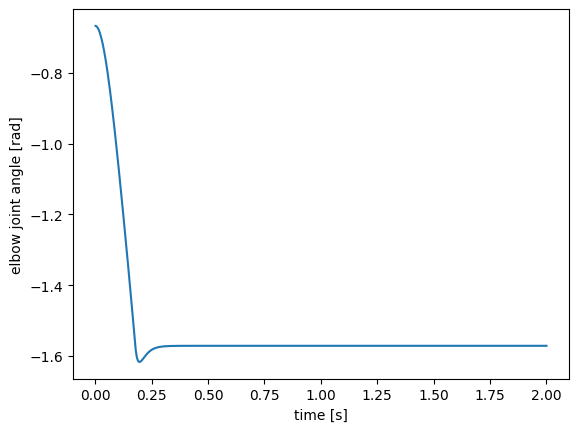

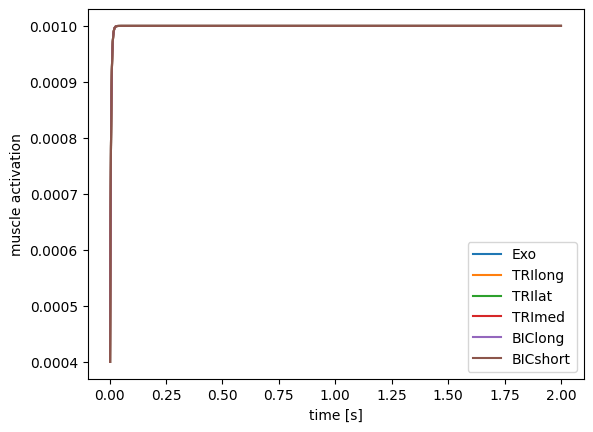

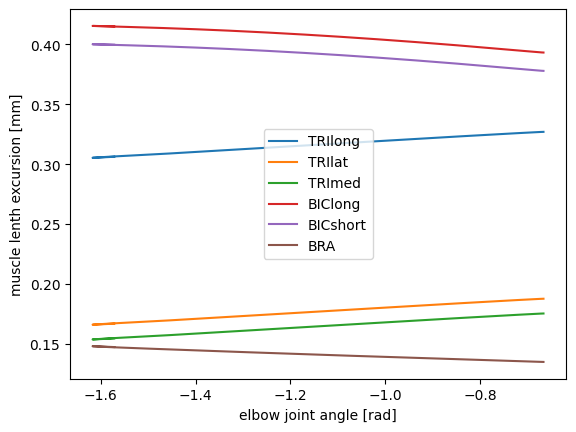

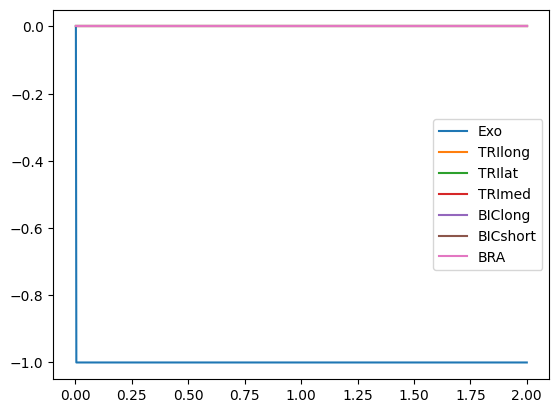

In [3]:
# control the actuator and get muscle and joint data

import mujoco
import numpy as np
import matplotlib.pyplot as plt

duration = 2  # (seconds)
framerate = 60  # (Hz)

# Path to the MuJoCo model file
# model_path = "../myosuite/simhive/myo_sim/elbow/myoelbow_1dof6muscles_1dofexo.xml"
model_path = "../myosuite/simhive/myo_sim/elbow/myoelbow_1dof6muscles_1dofexo_position.xml"

model = mujoco.MjModel.from_xml_path(model_path)
data = mujoco.MjData(model)

# turn off the gravity
model.opt.gravity[:] = [0, 0, 0]

# the joint position
jointPos = []
# the muscle length
muscLength = []
# the time
timevals = []
# muscle activation
muscleAct = []
# ctrl
ctrl = []

renderer = mujoco.Renderer(model)
frames = []
mujoco.mj_resetData(model, data)

data.qpos[:] = -0.6668

while data.time < duration:
    mujoco.mj_step(model, data)
    # mujoco.mj_forward(model, data) #same as mj_step but do not integrate in time.
    
    # record the current time
    timevals.append(data.time)
    # record the current joint position
    jointPos.append(data.qpos[0])
    # record the length of interested muscles
    muscLength.append(data.actuator_length[:].copy())
    # record the muscle activation
    muscleAct.append(data.act[:].copy())
    # record the control signal
    ctrl.append(data.ctrl[:].copy())

    # constant actuator signal
    data.ctrl[0] = -1
    
jointPos = np.array(jointPos)
muscLength = np.array(muscLength)# *1000 # change the unit from meter to millimeter
muscleAct = np.array(muscleAct)
ctrl = np.array(ctrl)

figure = plt.figure()
plt.plot(timevals, jointPos)
plt.xlabel('time [s]')
plt.ylabel('elbow joint angle [rad]')

figure = plt.figure()
for i in range(0, len(muscleAct[0,:])):
    plt.plot(timevals, muscleAct[:,i])
plt.xlabel('time [s]')
plt.ylabel('muscle activation')
muscles = ['Exo','TRIlong','TRIlat','TRImed','BIClong','BICshort','BRA']
plt.legend(muscles) 
plt.show()   
    
figure = plt.figure()
for i in range(1, len(muscLength[0,:])):  
    plt.plot(jointPos, muscLength[:,i])
plt.xlabel('elbow joint angle [rad]')    
plt.ylabel('muscle lenth excursion [mm]')
muscles = ['TRIlong','TRIlat','TRImed','BIClong','BICshort','BRA']
plt.legend(muscles) 
plt.show()

figure = plt.figure()
for i in range(0, len(ctrl[0,:])):  
    plt.plot(timevals, ctrl[:,i])
muscles = ['Exo','TRIlong','TRIlat','TRImed','BIClong','BICshort','BRA']
plt.legend(muscles) 
plt.show()